# Copia: quickstart

In [1]:
import pandas as pd

Load data:

In [2]:
df = pd.read_csv('datasets/dum.csv', sep=';', header=None)
df.columns = 'work', 'signature'
df.head()

,work,signature
0,Aiol (1),"Leiden, UB, BPL 1049; Brussel, KB, IV 816"
1,Aiol (2),"Breda, Arch. Begijnhof, z.s."
2,Alexanders geesten,"München, Bayerische Staatsbibliotheek, Cod. ge..."
3,Alexanders geesten,"Gent, UB, 2749,6"
4,Alexanders geesten,"Leiden, UB, Ltk. 1196"


Convert to abundance data:

In [3]:
from copia.utils import to_abundance
works = df['work']
abundance = to_abundance(works)
print(abundance)
print(abundance.sum())

[ 1  1  5  2  1  2  1  1  2  2  3  3  1  1  2  1  1  1  1  2  1  1  1  1
  1  1  4  1  1  7  1  1  3  1 10  1  3  2 10  4  2  1  3  6  5  2  5  2
  5  1  1  1  1  1  2 17  2  1  1  2  1  1  1  3  1  1  1  1  1  1  1  1
  1  1  1]
167


In [4]:
from copia.hill import hill_numbers
emp, est = hill_numbers(abundance)

100%|██████████| 1000/1000 [00:14<00:00, 68.30it/s]


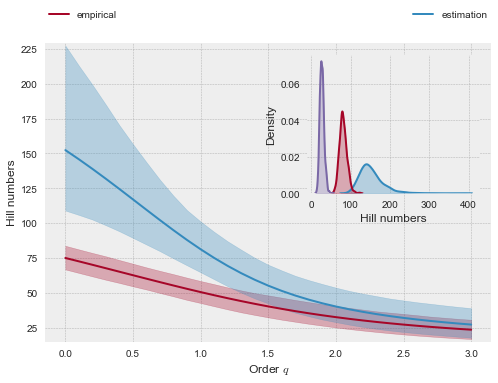

In [5]:
import copia.plot as plot
plot.hill_plot(emp, est)

100%|██████████| 100/100 [00:16<00:00,  5.75it/s]


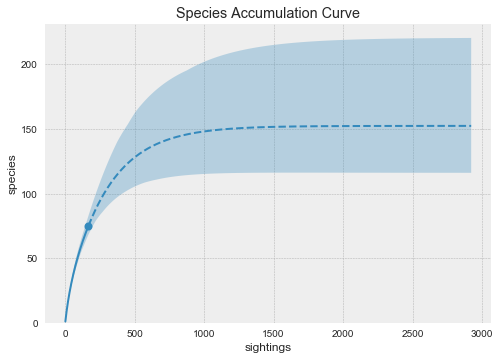

In [6]:
plot.species_accumulation_curve(abundance, incl_minsample=False)

100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


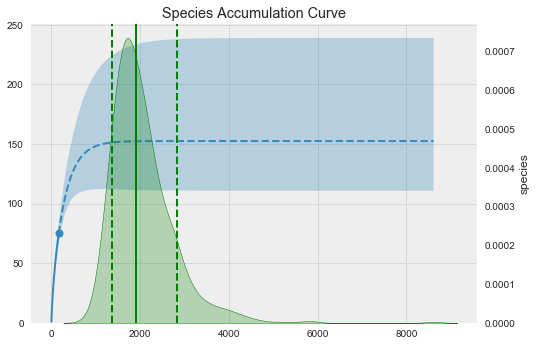

In [7]:
plot.species_accumulation_curve(abundance, incl_minsample=True)

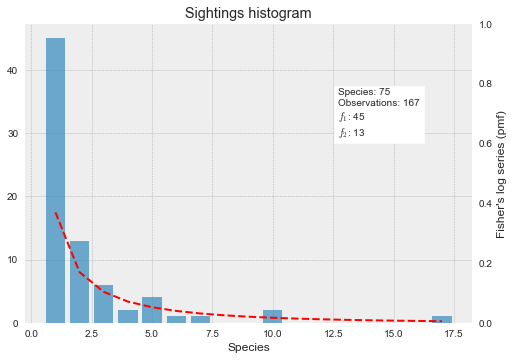

In [8]:
plot.abundance_histogram(abundance)

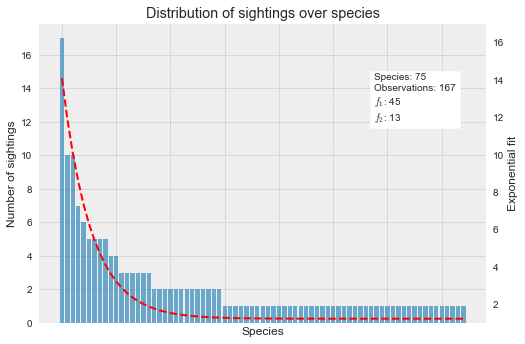

In [9]:
plot.abundance_counts(abundance)

Apply chao1:

In [10]:
from copia.richness import diversity
print('Empirical (species):', diversity(abundance)) # = diversity(abundance, method='empirical')
print('Empirical (sightings):', diversity(abundance, species=False))
print('chao1:', diversity(abundance, method='chao1'))
print('iChao1:', diversity(abundance, method='iChao1'))
print('ACE:', diversity(abundance, method='ACE'))
print('Egghe & Proot:', diversity(abundance, method='egghe_proot'))
print('Jackknife:', diversity(abundance, method='jackknife'))

Empirical (species): 75
Empirical (sightings): 167
chao1: 152.41824044219254
iChao1: 171.54324044219254
ACE: 152.3244760991645
Egghe & Proot: 170.30024512537264
Jackknife: 177.0


In [11]:
print(diversity(abundance, method='jackknife', return_order=True))
print(diversity(abundance, method='jackknife', return_order=True, return_ci=True))
print(diversity(abundance, method='jackknife', return_ci=True, conf=.89))
print(diversity(abundance, method='jackknife', return_order=False,
               return_ci=True, conf=.89))

{'richness': 177.0, 'order': 3}
{'richness': 177.0, 'order': 3, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}
{'richness': 177.0, 'lci': 127.80529442066658, 'uci': 226.1947055793334}


In [12]:
print(diversity(abundance, method='minsample'))
print(diversity(abundance, method='minsample', solver='grid'))
print(diversity(abundance, method='minsample', solver='fsolve'))
print(diversity(abundance, method='minsample', solver='grid', tolerance=1e-10))

2047.7560477560478
2047.7560477560478
2047.7544528130888
2047.7560477560478


/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 0.005726762492940907 > 1e-10
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')


## Compare multiple assemblages

In [4]:
assemblages = {}
for lang in ('dum', 'isl', 'gle', 'eng'):
    works = pd.read_csv(f'datasets/{lang}.csv', sep=';',
                        header=None).iloc[:, 0]
    assemblages[lang] = to_abundance(works)

100%|██████████| 1000/1000 [00:00<00:00, 4807.78it/s]


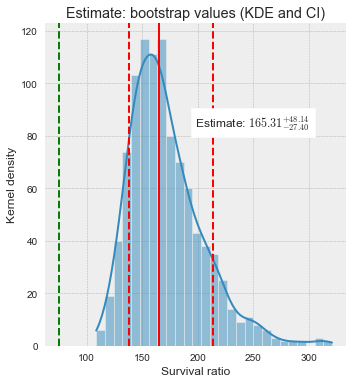

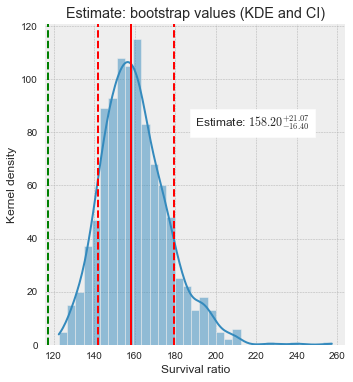

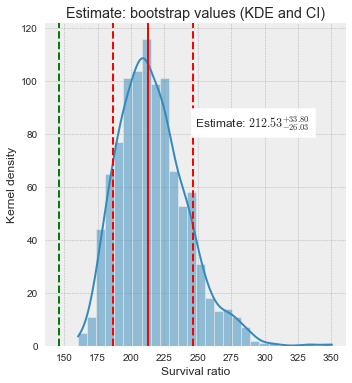

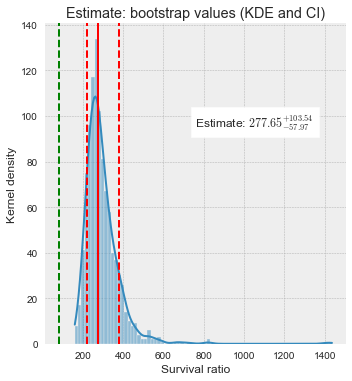

In [14]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical)

100%|██████████| 1000/1000 [00:00<00:00, 4822.09it/s]


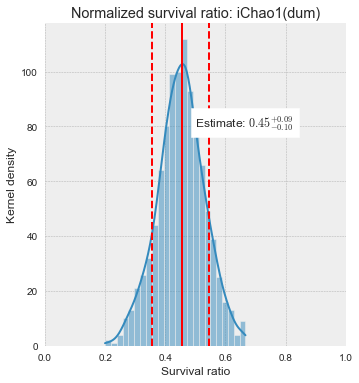

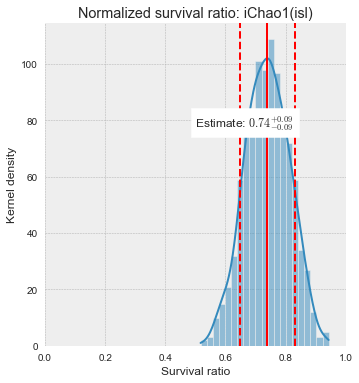

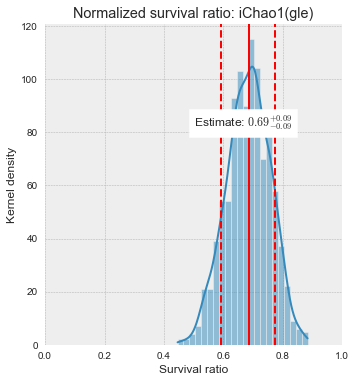

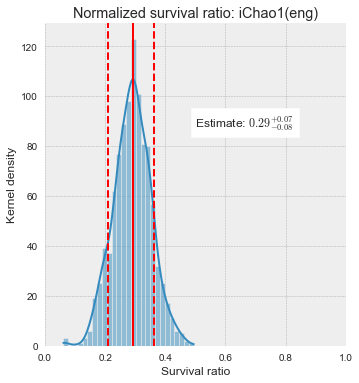

In [15]:
for lang, assemblage in assemblages.items():
    empirical = diversity(assemblage, method='empirical')
    estimate = diversity(assemblage, method='iChao1', CI=True)
    plot.richness_density(estimate, empirical, normalize=True,
                          title=f'Normalized survival ratio: iChao1({lang})')

100%|██████████| 1000/1000 [00:00<00:00, 4766.63it/s]


,label,survival,lCI,uCI
0,dum,0.437208,0.612979,0.292080
1,isl,0.731366,0.872681,0.599129
2,gle,0.675742,0.819540,0.544230
3,eng,0.273754,0.396166,0.170581


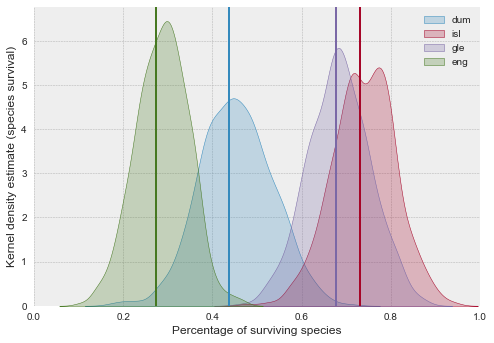

In [16]:
df = plot.survival(assemblages, method='iChao1')
df

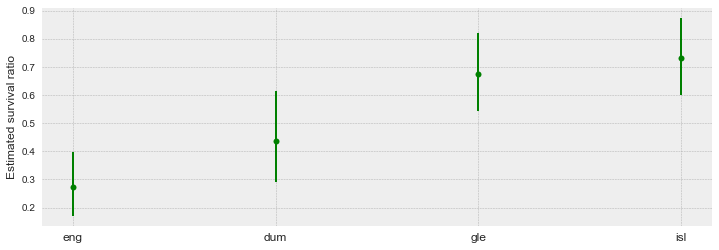

In [17]:
plot.survival_error(df)

  6%|▌         | 55/1000 [00:01<00:17, 53.52it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 99.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
  9%|▉         | 89/1000 [00:01<00:15, 59.28it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 89.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
 16%|█▌        | 162/1000 [00:02<00:14, 59.18it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 97.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
 78%|███████▊  | 777/1000 [00:13<00:03, 61.85it/s]/Users/mikekestemont/GitRepos/copia/copia/richness.py:416: UserWarning: Tolerance criterion not met: 107.0 > 0.1
  warnings.warn(f'Tolerance criterion not met: {diff_intersect} > {tolerance}')
100%|██████████| 1000/1000 [00:17

,label,survival,lCI,uCI
0,dum,0.081553,0.155059,0.044545
1,isl,0.203483,0.404552,0.114013
2,gle,0.168987,0.291381,0.104996
3,eng,0.030177,0.049700,0.016539


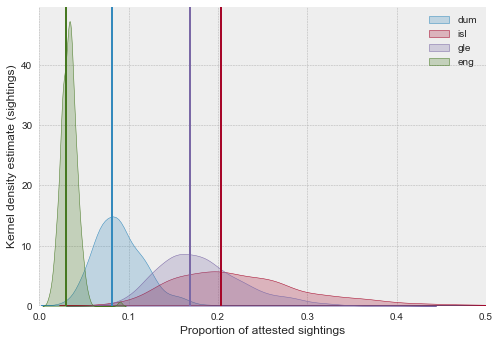

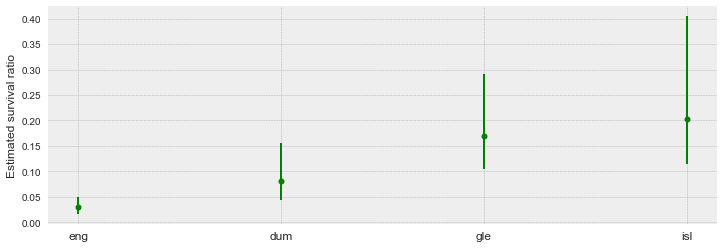

In [18]:
df = plot.survival(assemblages, method='minsample')
plot.survival_error(df)
df

100%|██████████| 1000/1000 [00:20<00:00, 49.89it/s]


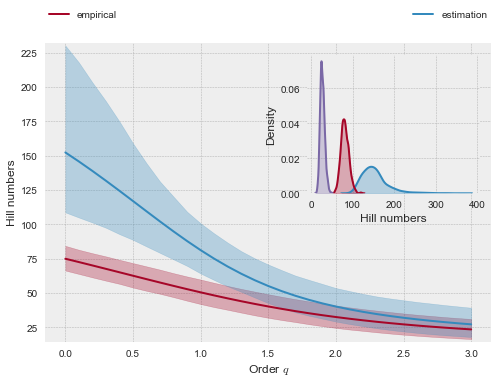

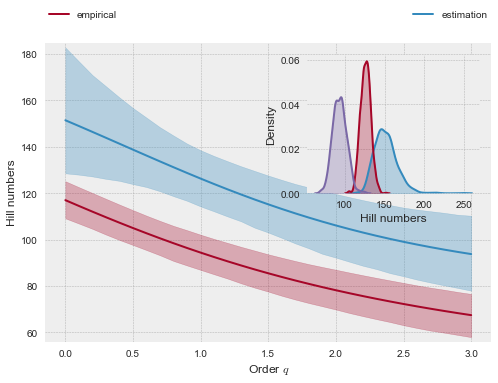

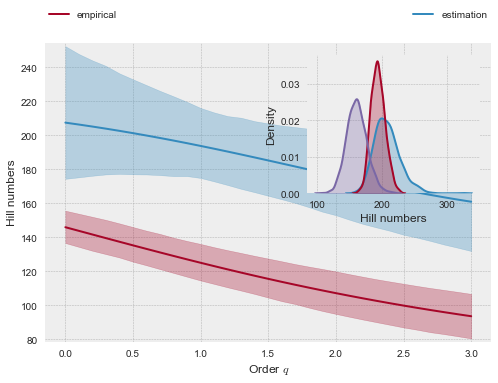

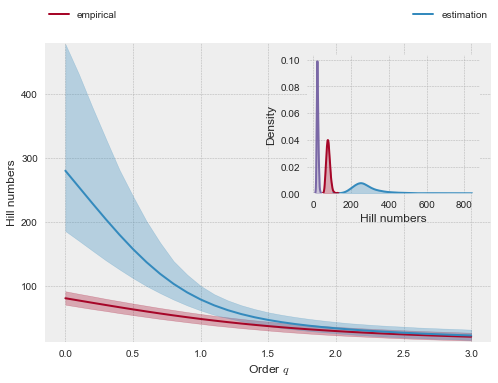

In [5]:
import copia.plot as plot
from copia.hill import hill_numbers

hill_est = {}
for lang, assemblage in assemblages.items():
    emp, est = hill_numbers(assemblage)
    plot.hill_plot(emp, est)
    hill_est[lang] = est

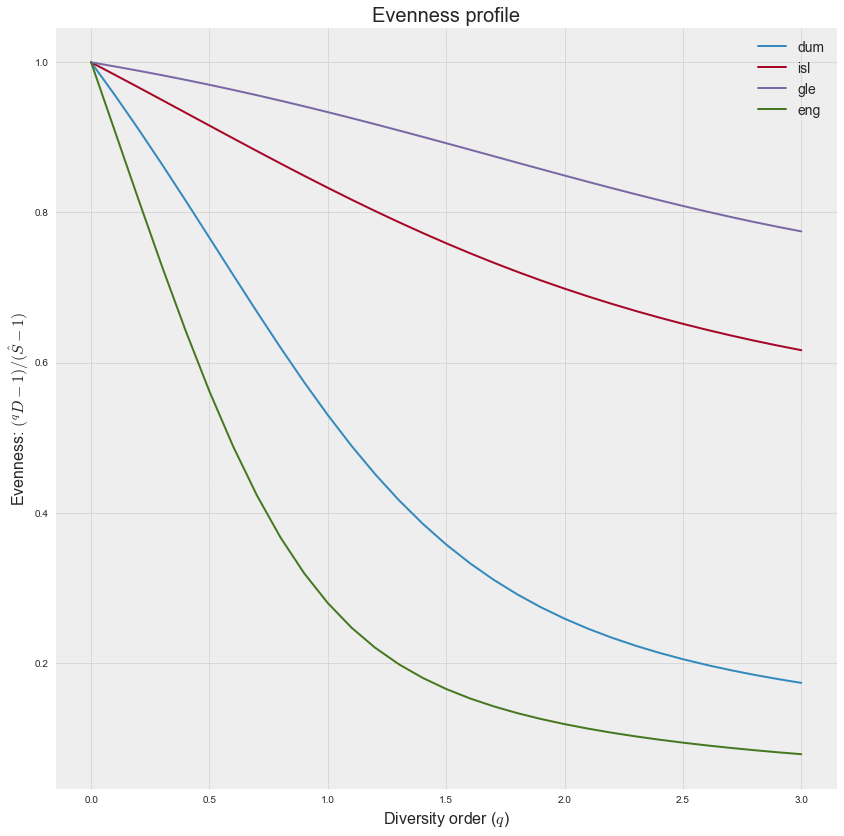

In [6]:
plot.evenness_plot(hill_est)

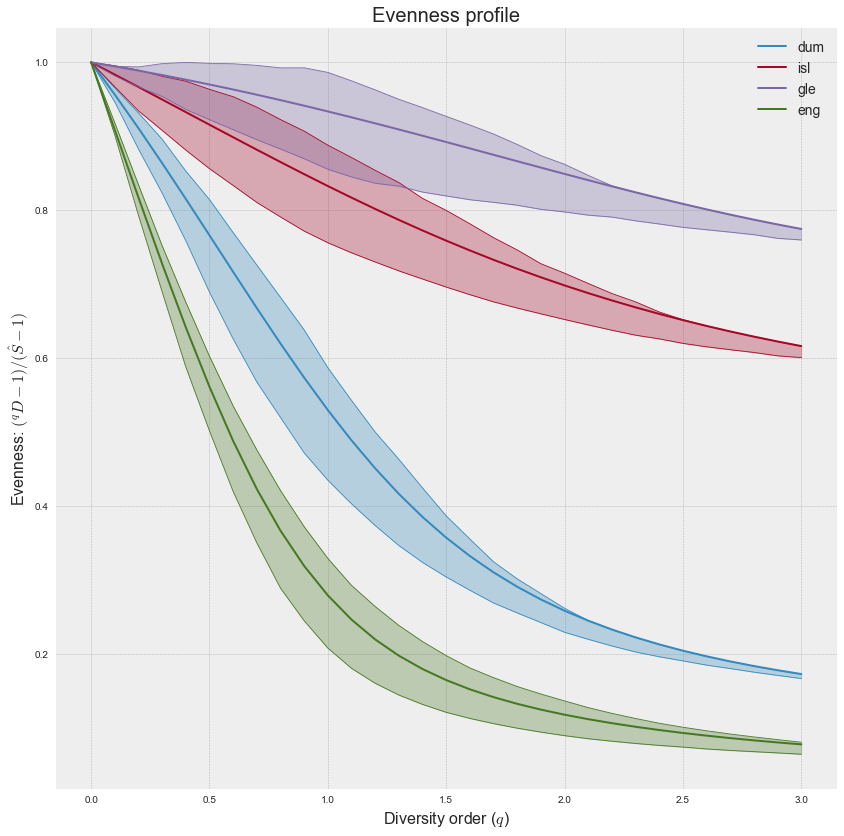

In [7]:
plot.evenness_plot(hill_est, incl_CI=True)